### Price comparison of Mercadona 

#### While working on the project I noticed there has been some changes in the prices on some items I decedid to explore this a bit more and to see which products 

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
mercadona_precio_0502 = pd.read_csv("../data/dynamic/mercadona/final_table.csv")
mercadona_precio_1102 = pd.read_csv("../data/dynamic/mercadona/final_table_1102.csv")
mercadona_precio_1102.head()

,Unnamed: 0,cat1,cat2,id,name,packaging,unit_price,iva,unit_size,size_format,price_decreased
0,0,"Aceite, especias y salsas","Aceite, vinagre y sal",112,"Aceite de oliva 0,4º Hacendado",Botella,9.25,5,1.00,l,False
1,1,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado,Garrafa,29.55,5,3.00,l,False
2,2,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado,Botella,9.90,5,1.00,l,False
3,3,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado Gran Se...,Botella,8.10,5,0.75,l,False
4,4,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva 1º Hacendado,Garrafa,46.00,5,5.00,l,False


In [129]:
mercadona_precio_0502.head()

,Unnamed: 0,cat1,cat2,id,name,packaging,unit_price,iva,unit_size,size_format,price_decreased
0,0,"Aceite, especias y salsas","Aceite, vinagre y sal",112,"Aceite de oliva 0,4º Hacendado",Botella,9.25,5,1.00,l,False
1,1,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado,Garrafa,29.55,5,3.00,l,False
2,2,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado,Botella,9.90,5,1.00,l,False
3,3,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva virgen extra Hacendado Gran Se...,Botella,8.10,5,0.75,l,False
4,4,"Aceite, especias y salsas","Aceite, vinagre y sal",112,Aceite de oliva 1º Hacendado,Garrafa,46.00,5,5.00,l,False


In [130]:
cols_merge = ["name", "packaging", "unit_price", "unit_size"]
df_old_new = mercadona_precio_0502[cols_merge].merge(mercadona_precio_1102[cols_merge], 
                                                        on=["name", "packaging","unit_size"], suffixes=["_old", "_new"])
df_old_new["diff_unit_price"] =  df_old_new["unit_price_new"] - df_old_new["unit_price_old"]
price_change = df_old_new[df_old_new["diff_unit_price"] != 0]
price_change.reset_index(drop=True, inplace=True)

price_change["diff_procent"] = ((price_change["unit_price_new"] / price_change["unit_price_old"]) * 100) - 100
filtered_price_change = price_change[~price_change.duplicated(subset=["name"], keep=False)]
filtered_price_change.reset_index(drop=True, inplace=True)
filtered_price_change


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,packaging,unit_price_old,unit_size,unit_price_new,diff_unit_price,diff_procent
0,Bebida energética Red Bull,Pack-4,4.60,1.0000,5.36,0.76,16.521739
1,Aceitunas rellenas de anchoa Hacendado reducid...,Bote,1.20,0.3500,1.40,0.20,16.666667
2,Aceitunas manzanilla rellenas de anchoa Hacend...,Pack-3,1.65,0.3600,1.80,0.15,9.090909
3,Barritas de barquillo Kit-Kat bañadas de choco...,Paquete,2.29,0.2075,3.00,0.71,31.004367
4,Surtido bombones Hacendado,Caja,2.20,0.1000,1.95,-0.25,-11.363636
5,Gel corporal infantil Deliplus,Bote,1.80,0.6000,2.05,0.25,13.888889
6,Vermouth bianco Martini,Botella,9.35,1.0000,10.70,1.35,14.438503
7,Vermouth rosso Martini,Botella,9.35,1.0000,10.70,1.35,14.438503
8,Cava semi seco Freixenet,Botella,5.95,0.7500,6.95,1.00,16.806723
9,Cacao soluble ColaCao original,Bote,5.69,0.7600,6.49,0.80,14.059754


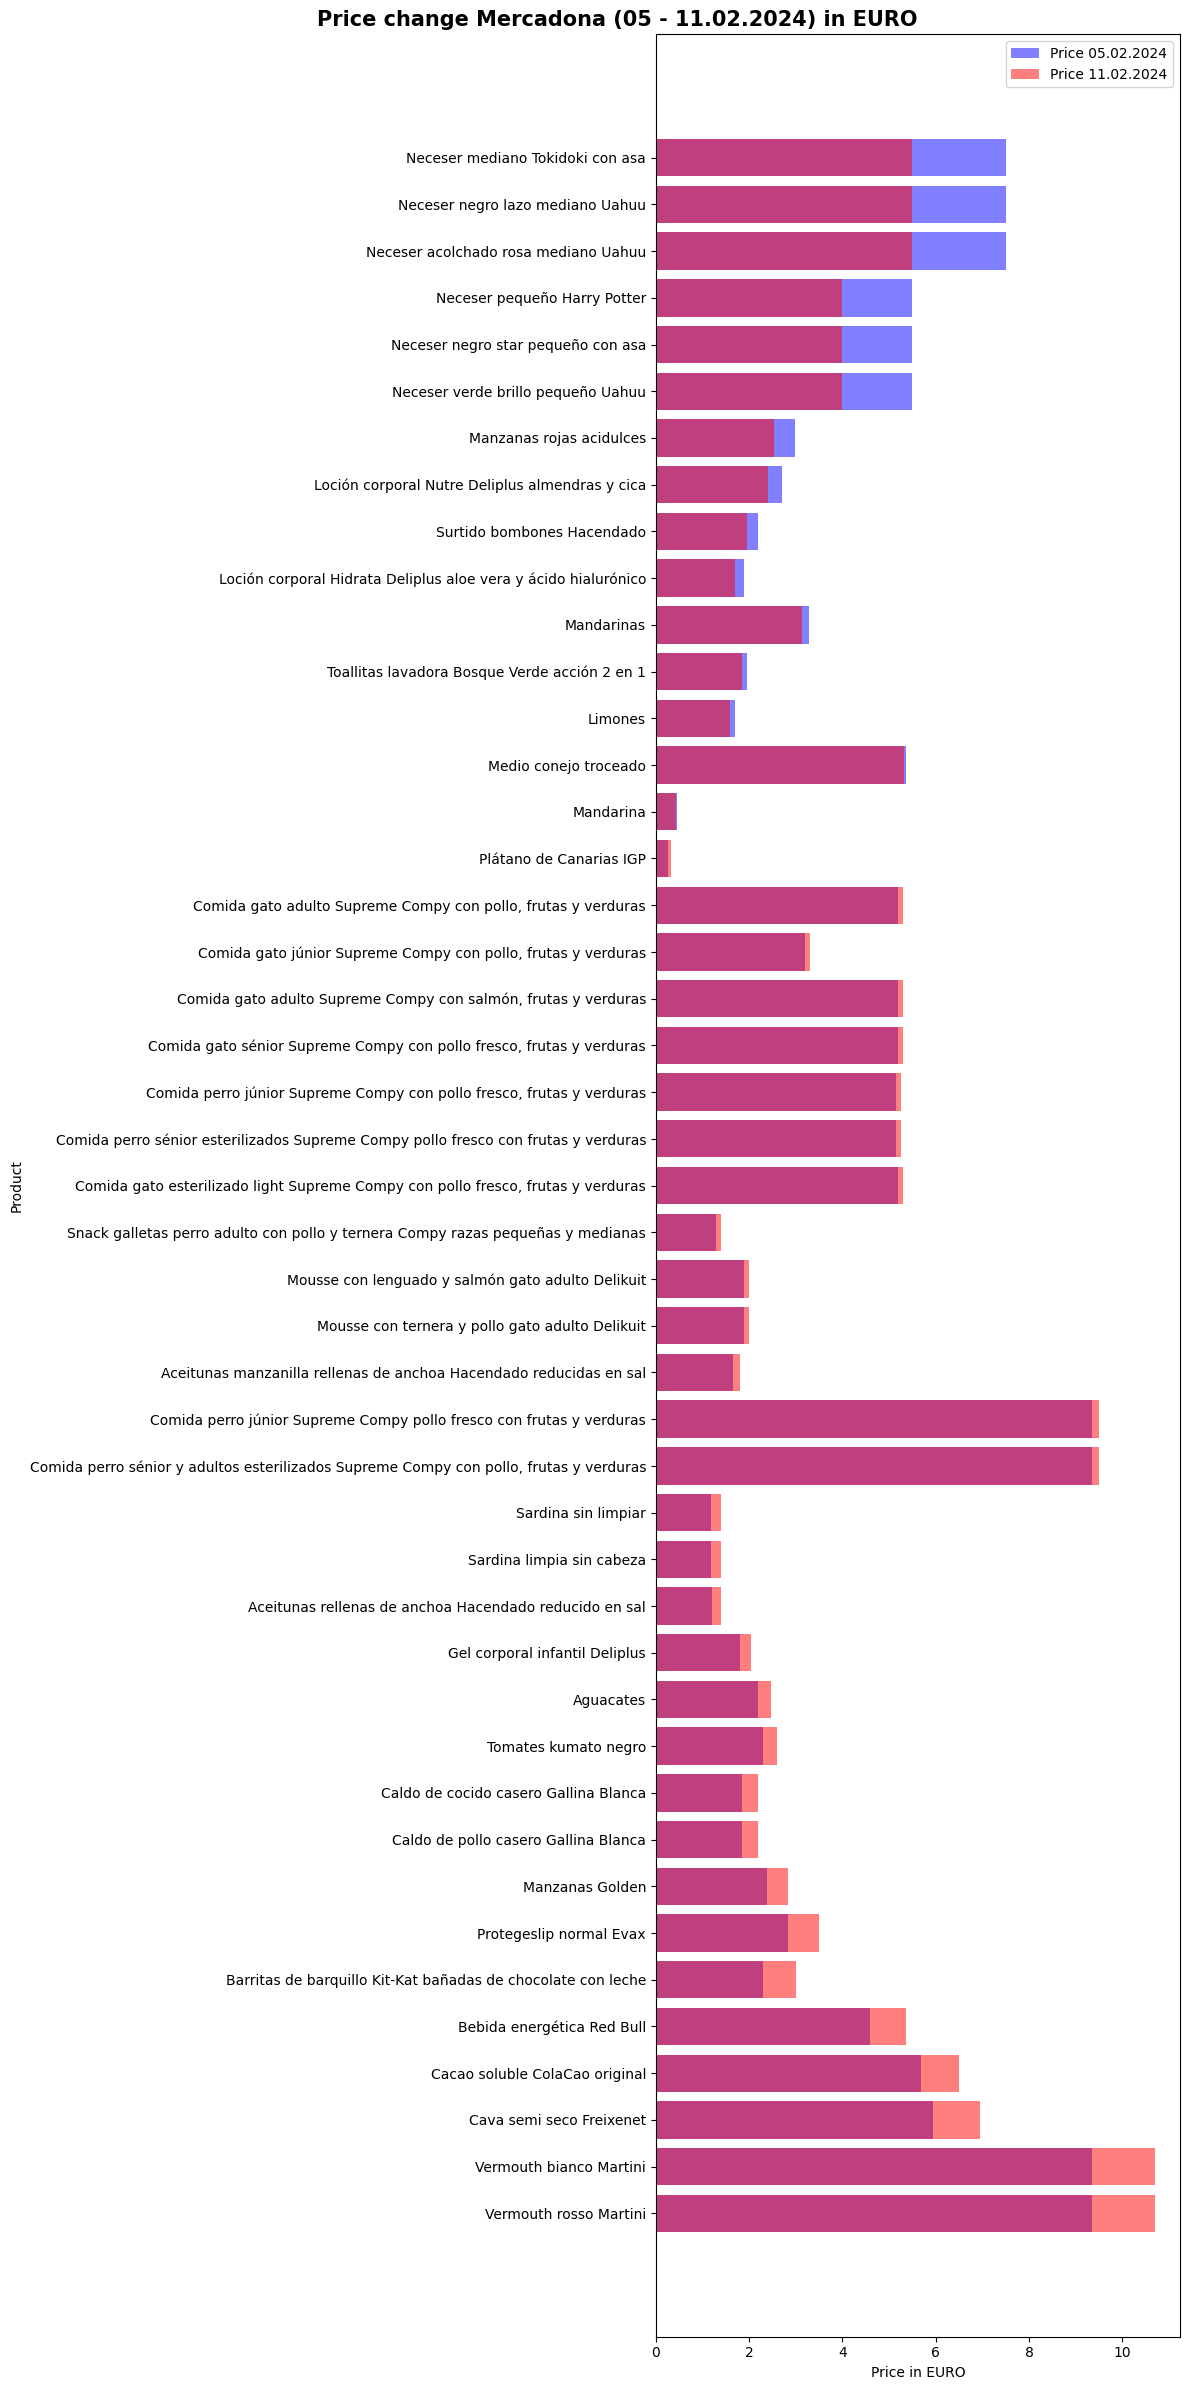

In [153]:

sorted_filter_price_change = filtered_price_change.sort_values("diff_unit_price", ascending = False)
x = sorted_filter_price_change["name"]
y1 = sorted_filter_price_change["unit_price_old"]
y2 = sorted_filter_price_change["unit_price_new"]

plt.figure(figsize=(12, 24))  # Swapping width and height for the figure size
plt.barh(x, y1, color='b', label="Price 05.02.2024", alpha = 0.5)  # Using barh for horizontal bar plot
plt.barh(x, y2, color='r', label="Price 11.02.2024", alpha = 0.5)
plt.ylabel("Product")  # Swapping x and y labels
plt.xlabel("Price in EURO")
plt.yticks(rotation=0)  # Rotating y-axis ticks if needed
plt.title('Price change Mercadona (05 - 11.02.2024) in EURO', ha="right", fontsize=15, fontweight='bold', loc="center")
plt.legend()
plt.tight_layout()
plt.show()

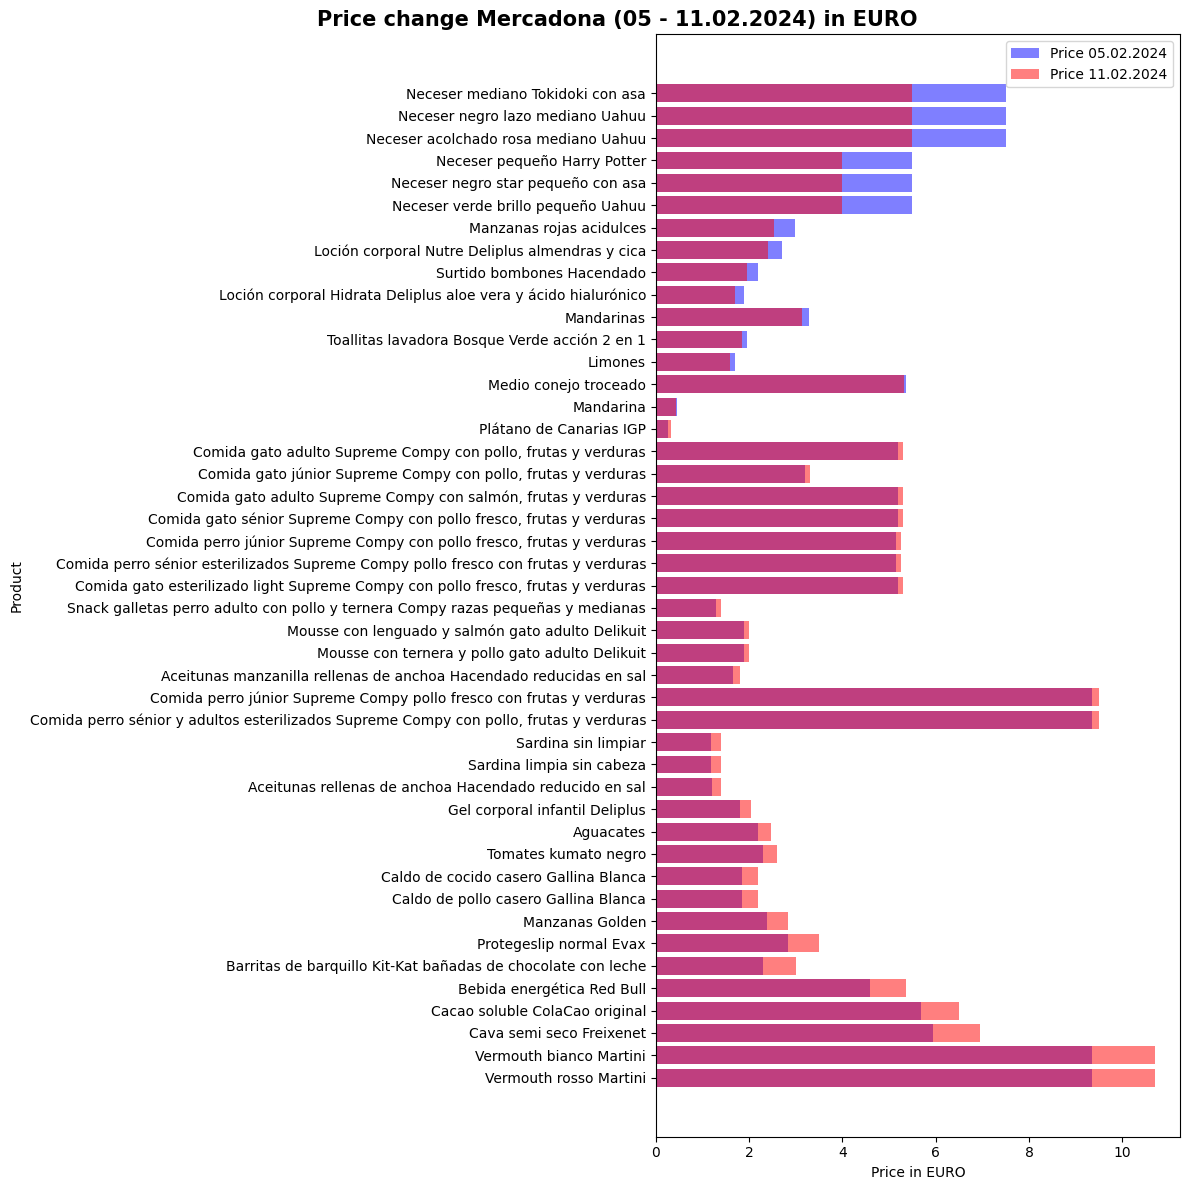

In [154]:
sorted_filter_price_change = filtered_price_change.sort_values("diff_unit_price", ascending=False)
x = sorted_filter_price_change["name"]
y1 = sorted_filter_price_change["unit_price_old"]
y2 = sorted_filter_price_change["unit_price_new"]

plt.figure(figsize=(12, 12))  # Adjusting the figure size for better column visibility
plt.barh(x, y1, color='b', label="Price 05.02.2024", alpha=0.5)  
plt.barh(x, y2, color='r', label="Price 11.02.2024", alpha=0.5)
plt.ylabel("Product")  
plt.xlabel("Price in EURO")
plt.xticks(rotation=0)  # Rotating x-axis ticks if needed
plt.title('Price change Mercadona (05 - 11.02.2024) in EURO', ha="right", fontsize=15, fontweight='bold', loc="center")
plt.legend()
plt.tight_layout()
plt.show()


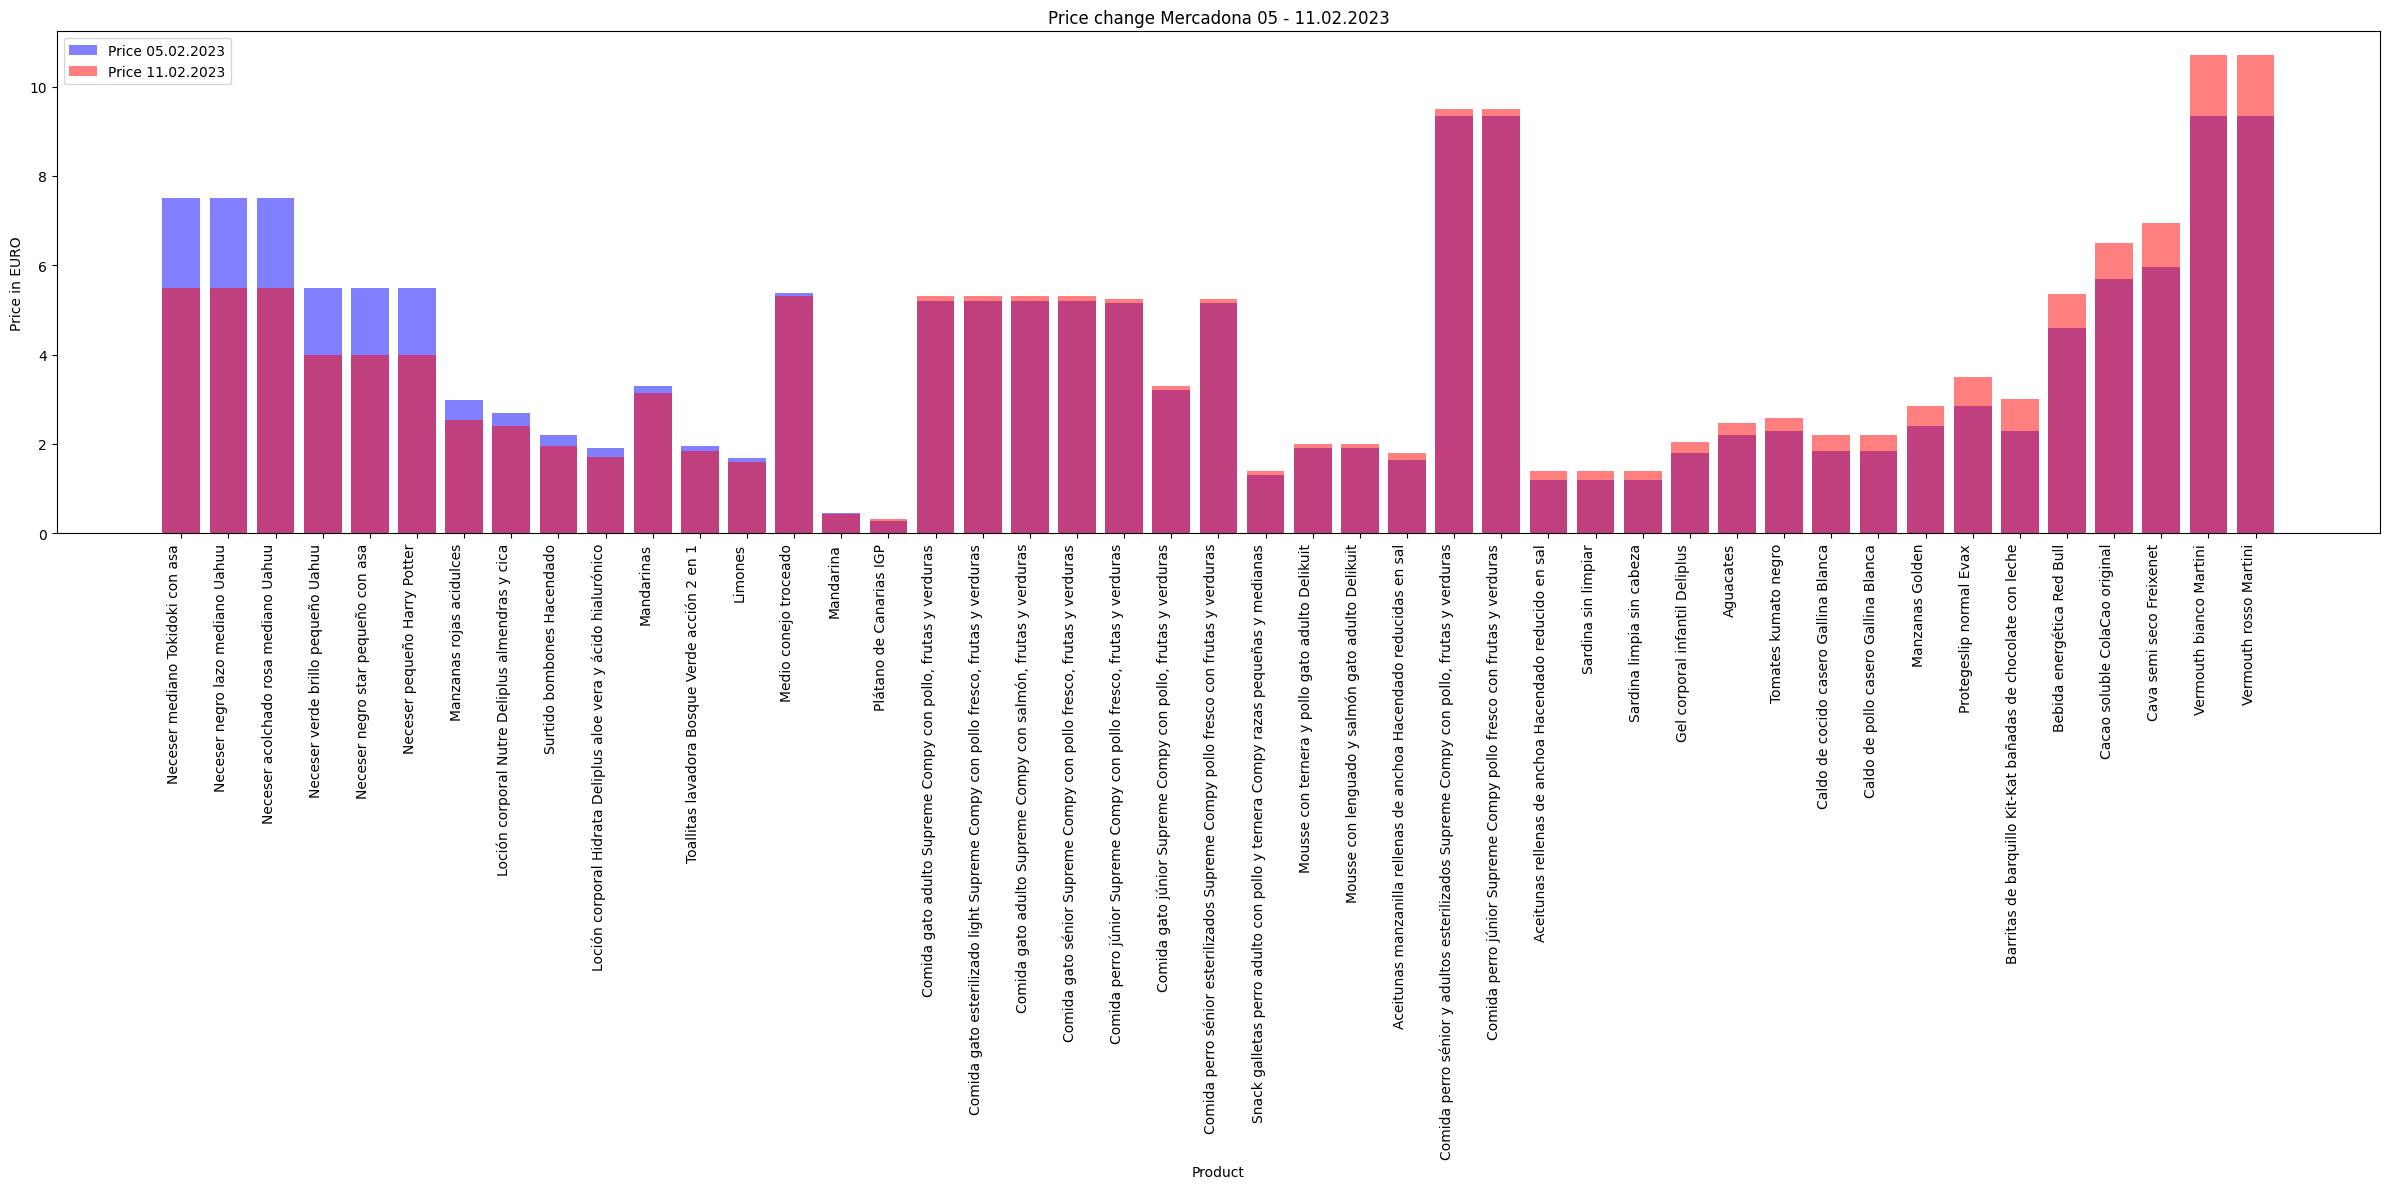

In [141]:
sorted_filter_price_change = filtered_price_change.sort_values("diff_unit_price", ascending = True)
x = sorted_filter_price_change["name"]
y1 = sorted_filter_price_change["unit_price_old"]
y2 = sorted_filter_price_change["unit_price_new"]

plt.figure(figsize=(24, 12))
plt.bar(x, y1, color='b', label="Price 05.02.2023", alpha = 0.5)
plt.bar(x, y2, color='r', label="Price 11.02.2023", alpha = 0.5)
plt.xlabel("Product")
plt.ylabel("Price in EURO")
plt.xticks(rotation=90, ha='right')
plt.title('Price change Mercadona 05 - 11.02.2023')
plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444438, 'Price difference in %')

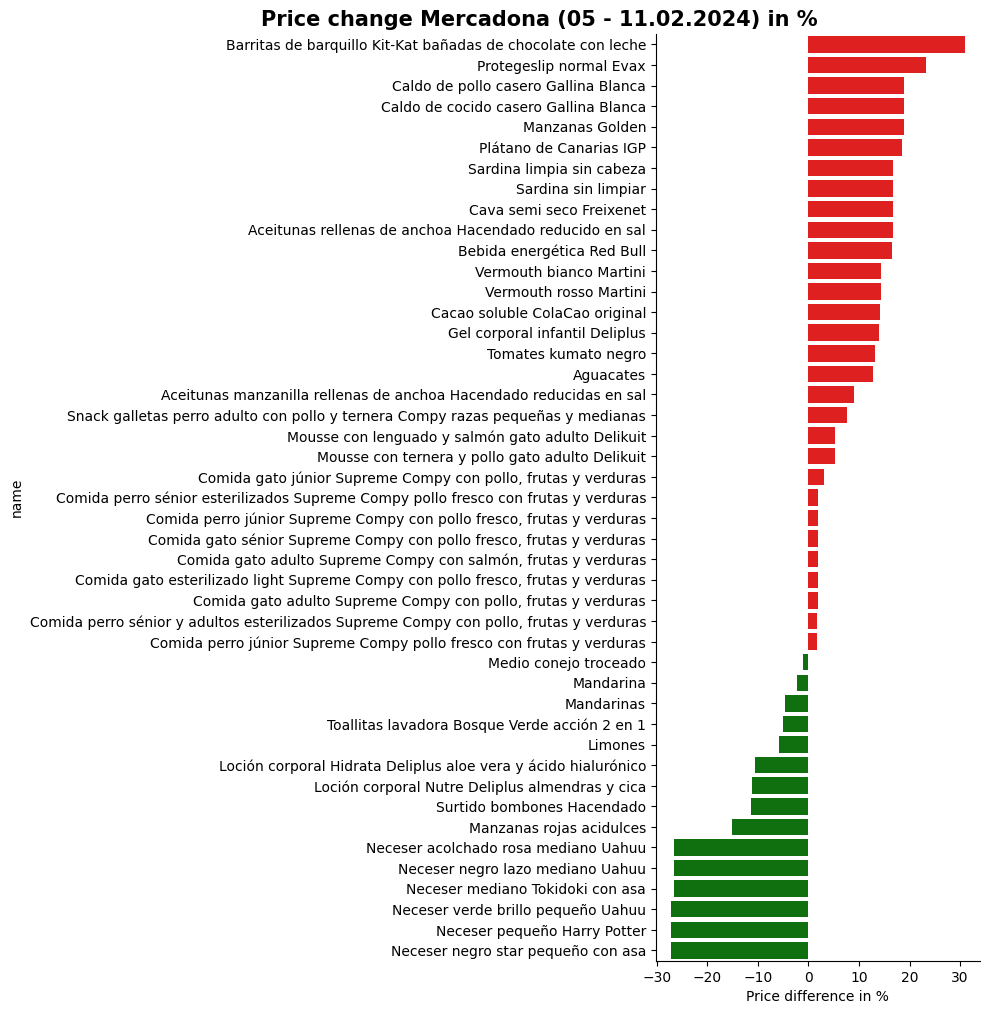

In [171]:
sort_porcent_price_change = filtered_price_change.sort_values("diff_procent", ascending= False)
my_color = np.where(sort_porcent_price_change["diff_procent"]<=0, 'green', 'red')
sns.catplot(data=sort_porcent_price_change, x="diff_procent", y="name", kind="bar", height=10, palette=my_color)
plt.title("Price change Mercadona (05 - 11.02.2024) in %", ha="right", fontsize=15, fontweight='bold', loc="center")
plt.xlabel("Price difference in %")
